# **Tutorial 4: Reconstructing Past Changes in Atmospheric Climate**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Yosmely Bermúdez, Dionessa Biton, Katrina Dobson, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Brodie Pearson, Jenna Pearson, Chi Zhang, Ohad Zivan 

**Content editors:** Yosmely Bermúdez, Zahra Khodakaramimaghsoud, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

## **Code and Data Sources**

Code for this tutorial is based on an existing notebook from LinkedEarth that [explores EPICA Dome C paleoclimate records](https://github.com/LinkedEarth/PaleoBooks/blob/master/notebooks/EpicaDomeC_explore.ipynb). 

Data from the following sources are used in this tutorial:

*   Jouzel, J., et al. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years, Science (2007). https://doi.org/10.1126/science.1141038. 
*   Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949.
*   Bereiter, B. et al., Revision of the EPICA Dome C CO<sub>2</sub> record from 800 to 600 kyr before present, Geoph. Res. Let. (2014).  https://doi.org/10.1002/2014GL061957. 















# **Tutorial Objectives**

In this tutorial, we’ll analyze δD and atmospheric CO<sub>2</sub> data from the EPICA Dome C ice core. Recall from the video that δD and δ<sup>18</sup>O measurements on ice cores records past changes in temperature, and that measurements of CO<sub>2</sub> trapped in ice cores can be used to reconstruction past changes in Earth's atmospheric composition.

By the end of this tutorial you will be able to:

*   Plot δD and CO<sub>2</sub> records from the EPICA Dome C ice core
*   Assess changes in temperature and atmospheric greenhouse gas concentration over the past 800,000 years 


In [ ]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video


# Setup

In [1]:
# # Install libraries
# !pip install pandas
# !pip install pooch

# !pip install cartopy
# !pip install Pyleoclim

In [1]:
# Import libraries
import pandas as pd
import pooch
import pyleoclim as pyleo

# **Section 1: Exploring past variations in atmospheric CO<sub>2</sub>**

As we learned in the video, paleoclimatologists can reconstruct past changes in atmospheric composition by measuring gases trapped in layers of ice from ice cores retrieved from polar regions and high elevation mountain glaciers. We'll specifically be focusing on paleoclimate records produced from the EPICA Dome C ice core from Antarctica.

Let's start by downloading the data for the composite CO<sub>2</sub> record for EPICA Dome C in Antarctica:

In [2]:
# Donwload the data using the url
data_path = pooch.retrieve(
    url='https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt',
    known_hash=None
)
co2df = pd.read_csv(data_path, skiprows=137, sep='\t')

co2df.head()

,age_gas_calBP,co2_ppm,co2_1s_ppm
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


Next, we can store this data as a `Series` in Pyleoclim:

In [3]:
ts_co2 = pyleo.Series(
    time=co2df['age_gas_calBP']/1000,
    value=co2df['co2_ppm'],
    time_name='Age',
    time_unit='kyr BP',
    value_name = r'$CO_2$',
    value_unit='ppm',
    label='EPICA Dome C CO2'
)

Time axis values sorted in ascending order


We can now plot age vs. CO<sub>2</sub> from EPICA Dome C:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='$CO_2$ [ppm]'>)

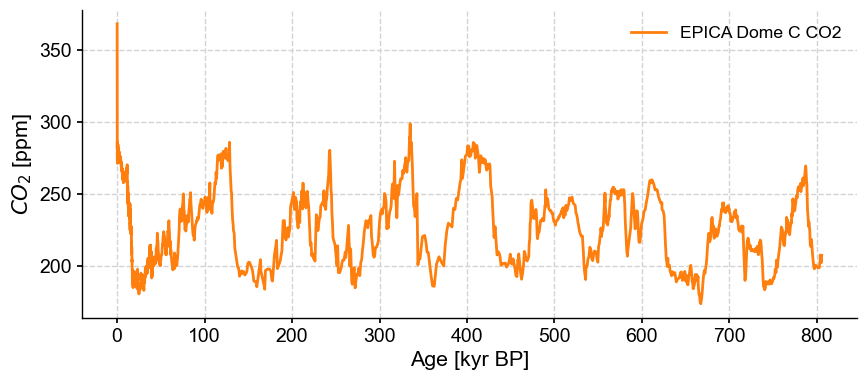

In [4]:
ts_co2.plot(color='C1')

Notice that the x-axis is plotted with present-day (0 kyr) on the left and the past (800 kyr) on the right. This is a common practice when plotting paleoclimate time series data.

What do you observe about the changes in CO<sub>2</sub> over the past 800,000 years? 

*   What might be causing this pattern?
*   Why is there a rapid increase in CO<sub>2</sub> in the very recent past (i.e., the past ~1,000 years)? 

In [5]:
## to remove the explanation  
print ("""
Write your observations here. Strong internal variability is observed within all three types of proxy records at interannual to interdecadal scales. Several factors can cause these variations, such as solar forcings and volcanic activities.
We can also observe the recent enhancement of ENSO variance from the plots. 
""")


Write your observations here. Strong internal variability is observed within all three types of proxy records at interannual to interdecadal scales. Several factors can cause these variations, such as solar forcings and volcanic activities.
We can also observe the recent enhancement of ENSO variance from the plots. 



# **Section 2: Exploring the relationship between δD and atmospheric CO<sub>2</sub>**

These changes in CO<sub>2</sub> are tracking glacial-interglacial cycles (Ice Ages) over the past 800,000 years. Recall that these Ice Ages occur as a result of changes in the orbital cycles of Earth: eccentricity (100,000 year cycle), obliquity (40,000 year cycle) and precession (21,000 year cycle).


To further investigate the relationship between glacial cycles, atmospheric CO<sub>2</sub> and temperature, we can compare CO<sub>2</sub> to a hydrogen isotopic values (δD) of ice cores, which is a proxy for temperature in this case. Remember, when interpreting isotopic measurements of ice cores, a more depleted δD value indicates cooler temperatures, and a more enriched δD value indicates warmer temperatures.

Let's download the EPICA Dome C δD data, store is as a `Series`, and plot the data:

In [6]:
# Donwload the data using the url
data_path = pooch.retrieve(
    'https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt',
    known_hash=None
)
dDdf = pd.read_csv(
    data_path,
    skiprows=91,
    encoding='unicode_escape',
    sep="\s+"
)
# Remove nan values
dDdf.dropna(inplace=True)

dDdf.head()

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.9,0.88
13,14,7.15,46.81203,-385.1,1.84
14,15,7.70,55.05624,-377.8,3.04
15,16,8.25,64.41511,-394.1,0.35
16,17,8.80,73.15077,-398.7,-0.42


In [7]:
dDts = pyleo.Series(
    time=dDdf['Age']/1000,
    value=dDdf['Deuterium'],
    time_name='Age',
    time_unit='kyr BP',
    value_name=r'$\delta D$',
    value_unit=u'\u2030',
    label=r'EPICA Dome C $\delta D$'
)

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='$\\delta D$ [‰]'>)

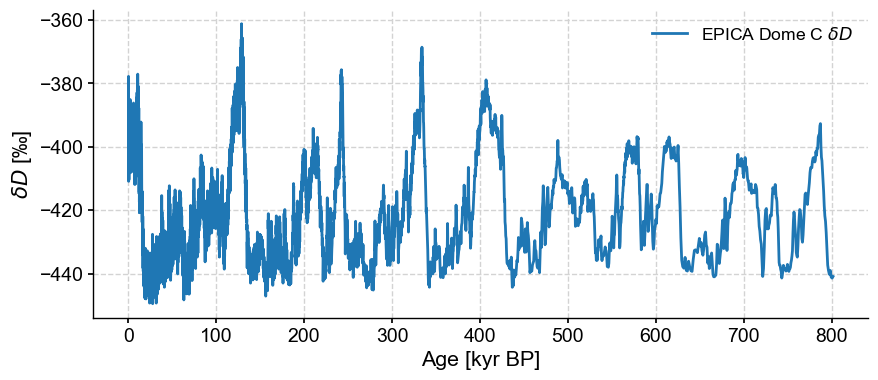

In [8]:
dDts.plot()

When we observe the δD data, we see very similar patterns as in the atmospheric CO<sub>2</sub> data. To more easily compare the two records, we can plot the two series side by side by putting them into a `MultipleSeries` object. Since the δD and CO<sub>2</sub> values have different units, we can first standardize the series and then plot the data. 

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='value'>)

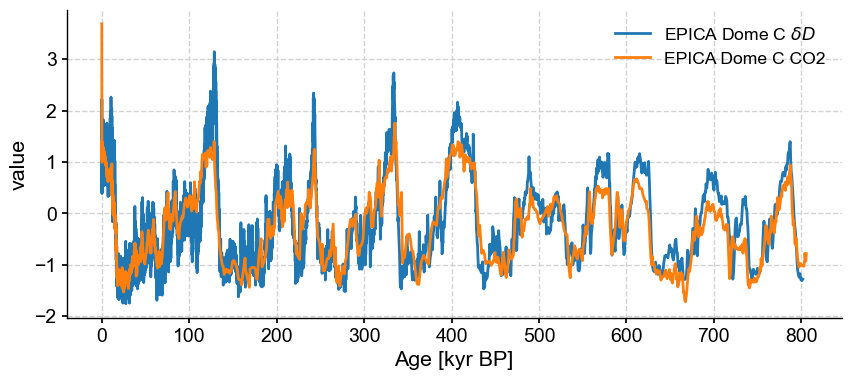

In [9]:
ms = pyleo.MultipleSeries([dDts,ts_co2])
ms.standardize().plot()

Now we can more easily compare the timing and magnitude of changes in CO<sub>2</sub> and δD at EPICA Dome C over the past 800,000 years. During glacial periods, δD was more depleted (cooler temperatures) and atmospheric CO<sub>2</sub>  was lower. During interglacial periods, δD was more enriched (warmer temperatures) and atmospheric CO<sub>2</sub>  was higher. Consider the following questions to further interpret this data:

*   Why do δD, CO<sub>2</sub> and glacial cycles covary so closely?
*   Can you identify glacial and interglacial periods? Today, are we in an interglacial or glacial period?
*   Do the cooling and warming periods of the cycles happen at the same rate?
*   How are the glacial cycles varied over this time?
*   What climate forcings do you think are driving these cycles?

In [10]:
## to remove the explanation  
print ("""
During glacial periods, lower temperatures lead to more oceanic absorption of CO₂, reducing atmospheric CO₂ levels. During interglacial periods, the reverse happens. This mutual influence creates a feedback loop, resulting in the observed covariation.
The cooling periods tend to be more gradual while warming periods are relatively rapid. These glacial-interglacial cycles are primarily driven by changes mentioned in the video, such as Earth's orbital parameters and volcanic activities.
""")


During glacial periods, lower temperatures lead to more oceanic absorption of CO₂, reducing atmospheric CO₂ levels. During interglacial periods, the reverse happens. This mutual influence creates a feedback loop, resulting in the observed covariation.
The cooling periods tend to be more gradual while warming periods are relatively rapid. These glacial-interglacial cycles are primarily driven by changes mentioned in the video, such as Earth's orbital parameters and volcanic activities.



# **Summary**
In this tutorial, we dove into the captivating world of paleoclimatology, focusing on the analysis of deuterium (δD) and atmospheric CO<sub>2</sub> data from the EPICA Dome C ice core. This involved understanding how δD and δ18O measurements from ice cores can enlighten us about past temperature changes, and how trapped CO<sub>2</sub> in these ice cores can help us reconstruct shifts in Earth's atmospheric composition.

By the end of the tutorial, you should be comfortable with plotting δD and CO<sub>2</sub> records from the EPICA Dome C ice core and assessing changes in temperature and atmospheric greenhouse gas concentrations over the past 800,000 years. In the next tutorial, we'll introduce various paleoclimate data analysis tools. 
